### Importing Filtered Dataset 

/var/folders/2s/wm7f2gbs68g8ym75ybdx9r0c0000gn/T/ipykernel_56951/4246269913.py:1: DtypeWarning: Columns (11,13,14,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  hbsc_data = pd.read_csv("HBSC2018OAed1.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244097 entries, 0 to 244096
Columns: 120 entries, HBSC to oweight_who
dtypes: float64(1), int64(10), object(109)
memory usage: 223.5+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 100079 entries, 53 to 244089
Columns: 120 entries, HBSC to oweight_who
dtypes: float64(1), int64(10), object(109)
memory usage: 92.4+ MB


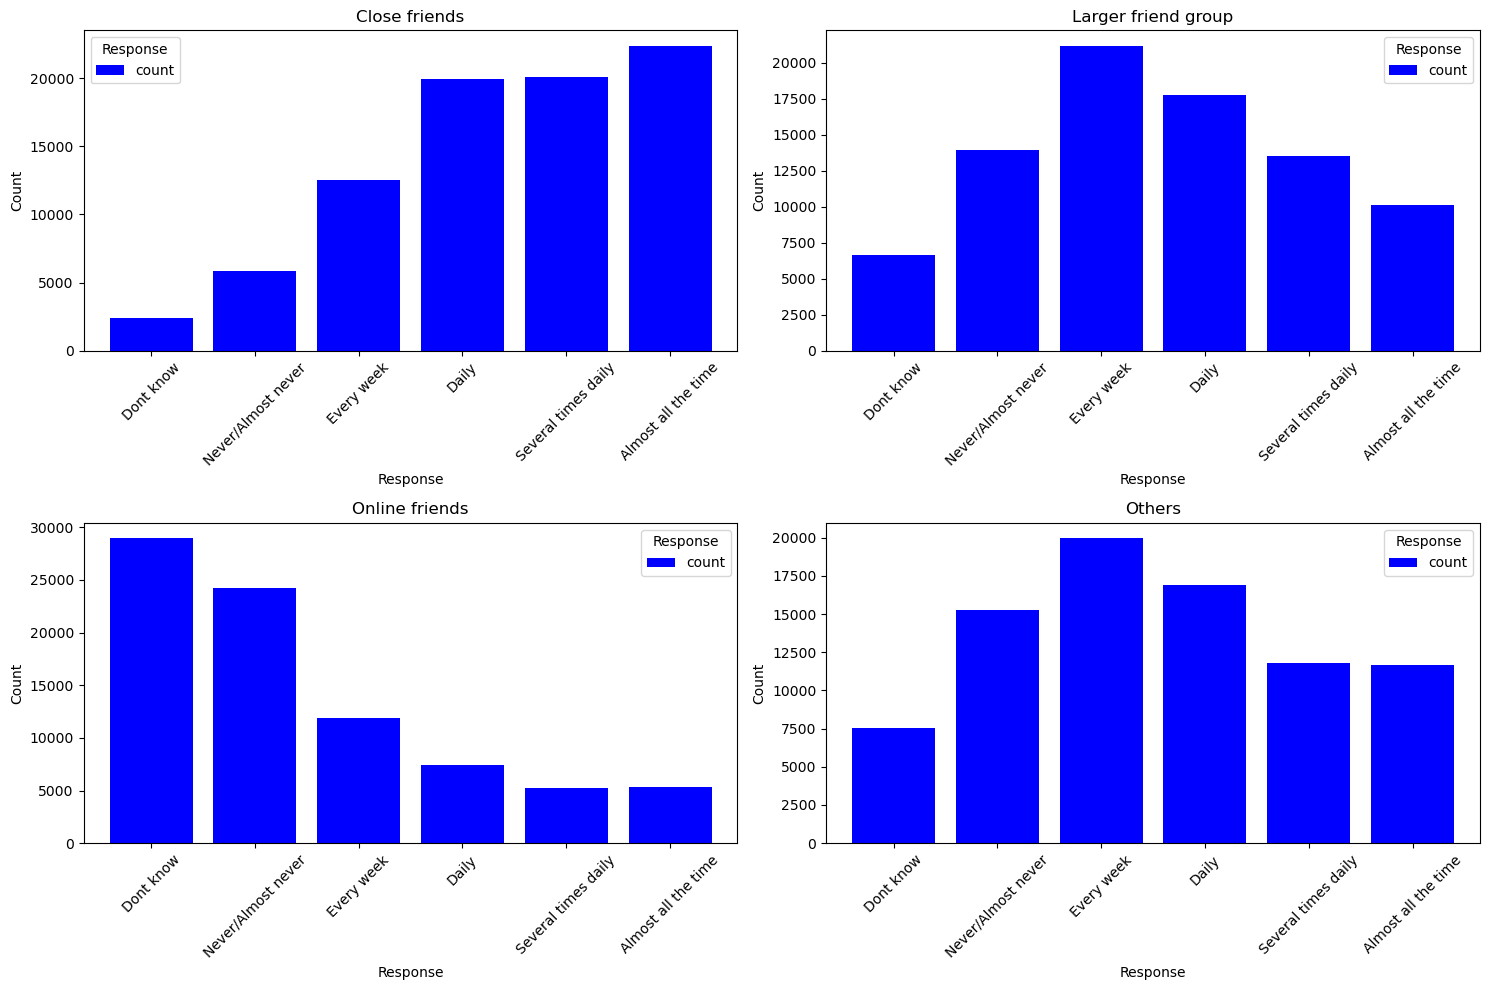

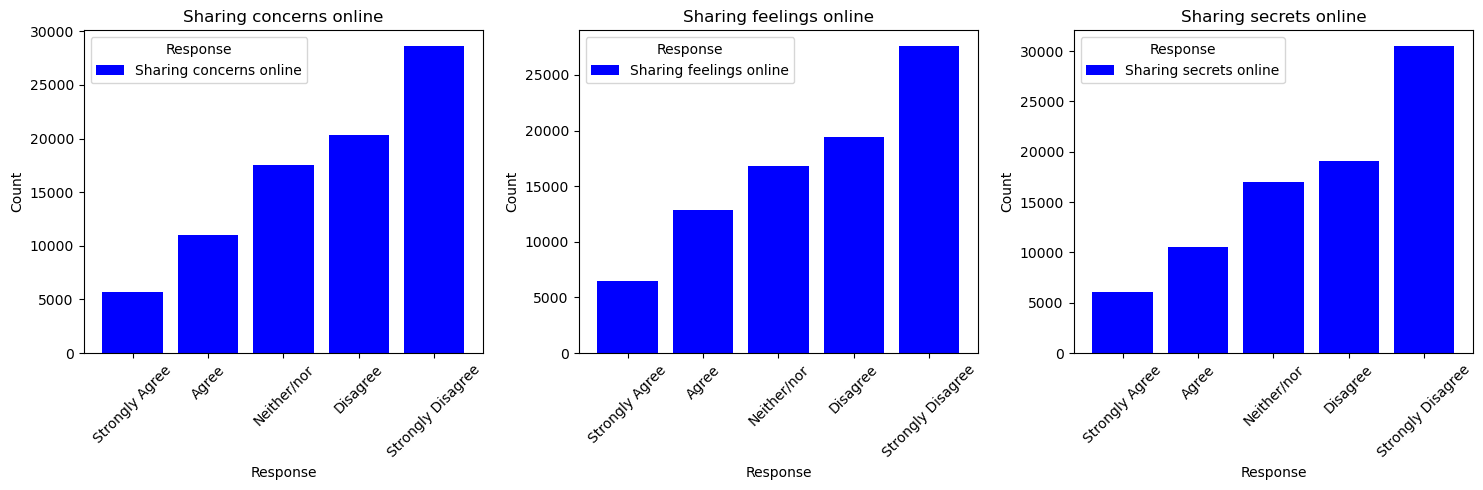

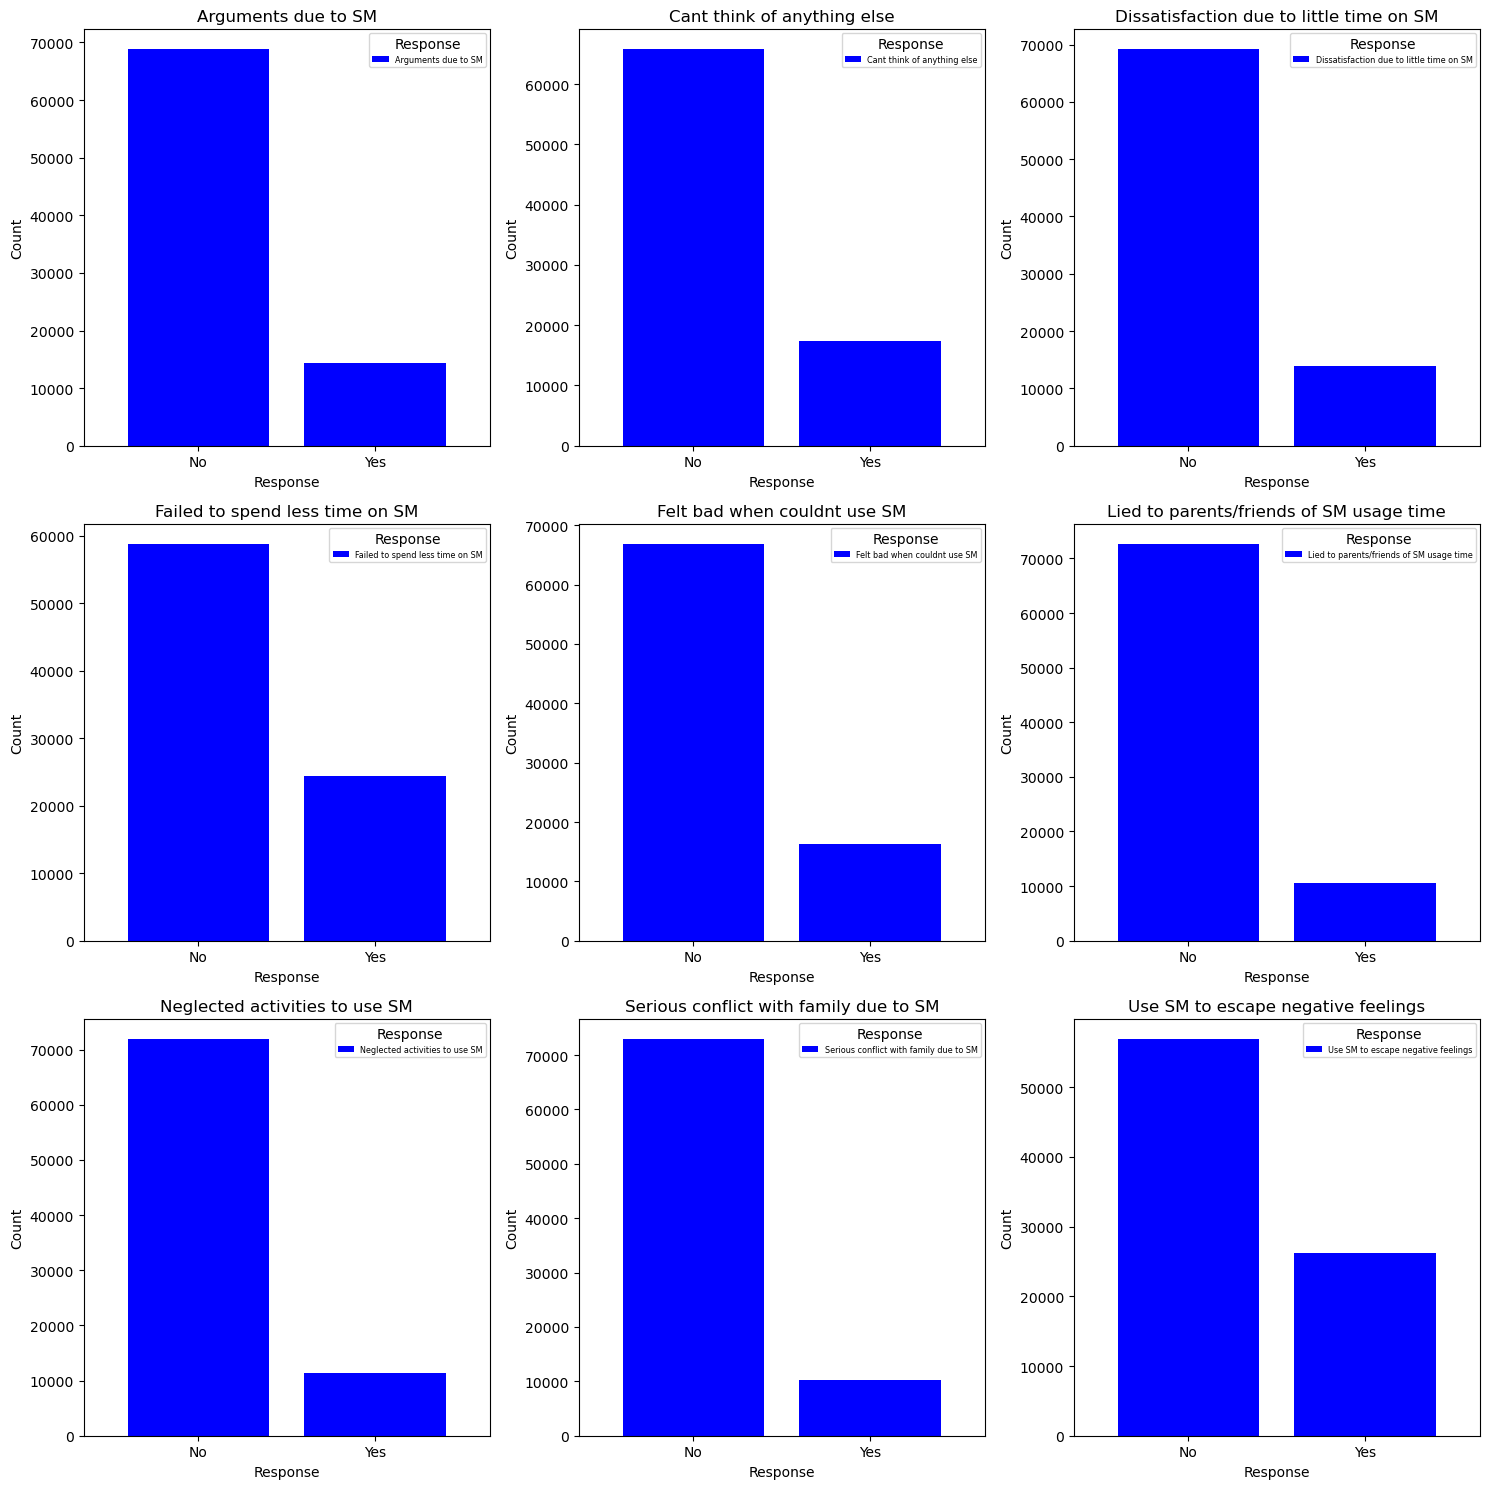

In [2]:
%run /Users/armanhundal/GitHub/Health-Behaviour-in-School-aged-Children-HBSC/data_cleaning_and_visualizations.ipynb

### Importing Packages

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
import os as os
from itertools import product
import scipy.stats as ss

## **1. Social Media Use (SMU) and Health Outcomes (Statistical Correlation Testing)** 
After cleaning our data and selecting the 18 countries from the Boniel-Nissim et al., 2023 study that deliberately track sleep data we can now start to measure any correlations that exist between social media use and sleep quality. Our filtered dataset only contains the social media columns as those were the survey responses we wanted to visualize. We can now take our SMU columns and compare them with the health outcomes we are most interested in to see if there is any statistical correlation. We will start with SMU and its correlations with Sleeping Difficulty. 

### 1.1 SMU and Sleeping Difficulty  
Our SMU columns and Sleeping Difficulty were both measured using categorical survey responses. Interpretations of the SMU columns and their response values are in data_cleaning_and_visualizations.ipynb Section 2.1 . For the Sleep difficulty question in the HBSC survey school children aged 11-15 were asked: "In the last 6 months how often have you had difficulties in getting to sleep?" Possible survey responses are listed in the table below. 
Answer Statement shown to participants     | Numerical value 
:-------------------------------------------:|:-----------------:
About every day       | 1
More once/week        | 2
About every week      | 3
About every month     | 4
Rarely or never       | 5

Given that we will be testing for correlations between 2 groups of categorical responses (16 SMU questions compared to 1 Sleep related question) Chi-Squared Test of Independence is the most appropriate statistical measure of significance. 

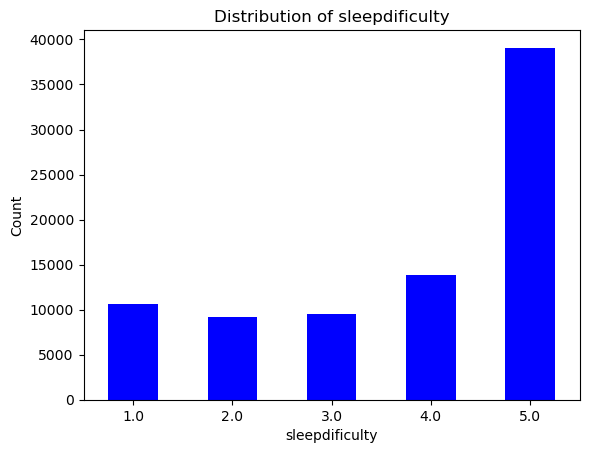

In [9]:
#The dataframe hbsc_data_filtered already has the columns we need and the NaN values have been filtered out
social_media_column_list.append("sleepdificulty") 

cols = convert_to_numeric(hbsc_data, social_media_column_list) 
               
#Applying indexing to column names 
column_mapping = [f"{x[0]}:{x[1]}" for x in enumerate(cols)]

# We need to select columns 3, 33, 74-89
selected_columns_dataframe = hbsc_data.iloc[:, np.r_[3, 33, 74:90]]

#Removing all 99 and NaN rows  
hbsc_data_filtered = selected_columns_dataframe[
    (~selected_columns_dataframe.isin([99, np.nan])).all(axis=1)]

hbsc_data_filtered["sleepdificulty"].value_counts().reindex([1.0, 2.0, 3.0, 4.0, 5.0]).plot(kind="bar", color = "blue")
plt.xlabel("sleepdificulty")
plt.ylabel("Count")
plt.title("Distribution of sleepdificulty")
plt.xticks(rotation = 0) 
plt.show()